# Sarah Aguasvivas HW 0 Readme

At first, my logic was to use a first order differentiation scheme at $\Omega$ and later worry about the end points. I ran into the problem of not knowing what to do with that end point, so I used a first order backward differentiation scheme:

\begin{equation*}
D =  \begin{bmatrix}
-\frac{1.0}{h_i} & \frac{1.0}{h_i} & 0 &... & 0\\
0 & -\frac{1.0}{h_i} & \frac{1.0}{h_i} & 0& ...\\
0 & 0 &-\frac{1.0}{h_i} & \frac{1.0}{h_i} & 0...\\
\vdots\\
0 & 0 &0 & -\frac{1.0}{h_i} & -\frac{1.0}{h_i}\\
\end{bmatrix}
\end{equation*}

where $h_i= x[i]- x[i-1]$. At the end point, it provided the same result as the second last point, which is not desirable. Then, I tried using a second order backward differentiation scheme in the last point and it got a better approximation on the last point. However, I realized that the rest of diffmat() did not differentiate as well overall. Therefore, I decided to make the whole differentiation second order.  


## Second Attempt (Second Order Accurate)

I then decided to change the whole D matrix to be second order with the following considerations:

* In the points that are not in the corners, I am going to use second order central difference.
* In the left corner, I am going to use second order forward difference and in the right corner I will use second order backward difference. 
* Instead of dividing by 2h, I am going to be dividing by $h^*=x[i]-x[i-2]$ or $h^*=x[i+1]-x[i-1]$ according to the differentiation scheme.

The resulting matrix after those considerations was the following:
    
\begin{equation*}
D =  \begin{bmatrix}
-\frac{3.0}{h*_i} & \frac{4.0}{h*_i} & -\frac{1.0}{h*_i} &... & 0& 0...\\
 -\frac{1.0}{h*_i} & 0 & \frac{1.0}{h*_i} & 0& 0 & 0...\\
 0 &-\frac{1.0}{h*_i} & 0 & \frac{1.0}{h*_i} & 0 & 0...\\
\vdots\\
 0 &0 & ...&\frac{1.0}{h*_i} & \frac{-4.0}{h*_i}& \frac{3.0}{h*_i} \\
\end{bmatrix}
\end{equation*}  

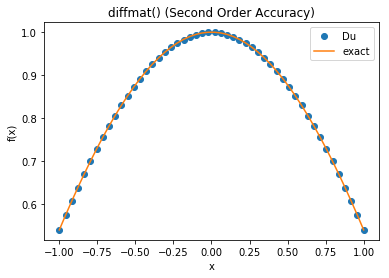

In [46]:
import numpy
from matplotlib import pyplot

#pyplot.style.use('ggplot')

def diffmat(x):
    D=numpy.eye(x.shape[0]) 
    
    for i in range(D.shape[0]):
        if (i < D.shape[0]-1) & (i!=0):
            h= x[i+1]-x[i-1]
            D[i,i+1] = 1.0/h
            D[i,i] = 0.0
            D[i,i-1] = -1.0/h
        elif (i==0):
            h= x[i+2]-x[i]
            D[i,i]= -3.0/h
            D[i,i+1]= 4.0/h
            D[i, i+2]= -1.0/h
        else:
            h= x[i]-x[i-2]
            D[i, i]= 3.0/h
            D[i, i-1] = -4.0/h
            D[i, i-2] = 1.0/h
          
    return D

n= 50
x= numpy.linspace(-1,1,n)
y=numpy.cos(x) # first derivative
f= numpy.sin(x) #function in question

DD=diffmat(x)

pyplot.figure()
pyplot.plot(x, numpy.dot(DD, f), 'o', label= 'Du') #directly plotting Du
pyplot.plot(x, y, label='exact')
pyplot.xlabel('x')
pyplot.ylabel('f(x)')
pyplot.legend(loc='upper right')
pyplot.title('diffmat() (Second Order Accuracy)')
pyplot.show()

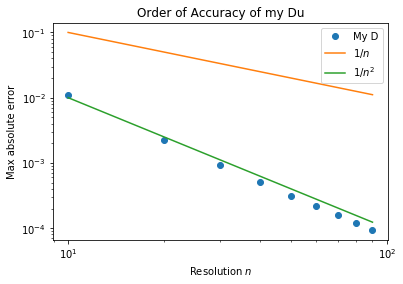

In [47]:
nn= numpy.arange(10,100,10)
error=[]
for i in nn:
    xx=numpy.linspace(-1,1, i)
    f= numpy.sin(xx)
    yy= numpy.dot(diffmat(xx), f)
    error.append(numpy.linalg.norm(yy - numpy.cos(xx), numpy.inf))

#pyplot.figure()
pyplot.loglog(nn, error,'o',label= 'My D')
pyplot.loglog(nn, nn**(-1.), label='$1/n$')
pyplot.loglog(nn, nn**(-2.), label='$1/n^2$')
pyplot.xlabel('Resolution $n$')
pyplot.ylabel('Max absolute error')
pyplot.legend(loc='upper right')
pyplot.title('Order of Accuracy of my Du')
pyplot.show()

## What about $D_2$?


For the second derivative, since my final matrix D is square, I realized that the operator:

\begin{equation}
DDu
\end{equation}

can perform the second derivative. To test this:

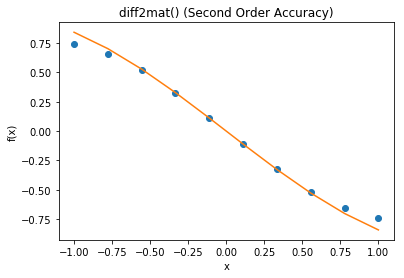

In [18]:
def diff2mat(x):
    return numpy.dot(diffmat(x), diffmat(x))
                     
n= 10
x= numpy.linspace(-1,1,n)                     
f= numpy.sin(x)
ff=-numpy.sin(x)
DD2= diff2mat(x)

pyplot.figure()
pyplot.plot(x, numpy.dot(DD2, f), 'o') #directly plotting DDu
pyplot.plot(x, ff)
pyplot.xlabel('x')
pyplot.ylabel('f(x)')
pyplot.title('diff2mat() (Second Order Accuracy)')
pyplot.show()

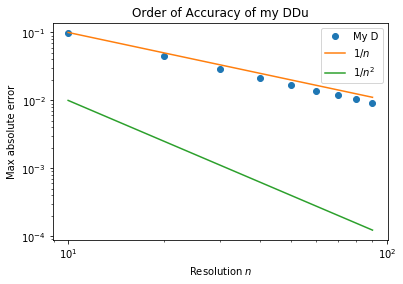

In [48]:
nn= numpy.arange(10,100,10)
error2=[]
for i in nn:
    xx=numpy.linspace(-1,1, i)
    f= numpy.sin(xx)
    yy= numpy.dot(diff2mat(xx), f)
    error2.append(numpy.linalg.norm(yy + numpy.sin(xx), numpy.inf))

#pyplot.figure()
pyplot.loglog(nn, error2,'o',label= 'My D')
pyplot.loglog(nn, nn**(-1.), label='$1/n$')
pyplot.loglog(nn, nn**(-2.), label='$1/n^2$')
pyplot.xlabel('Resolution $n$')
pyplot.ylabel('Max absolute error')
pyplot.legend(loc='upper right')
pyplot.title('Order of Accuracy of my DDu')
pyplot.show()

It turned out that DDu is first order accurate!

## Testing with Different Functions

I am going to test the following functions:
    
    * cos(x) -> -sin(x) -> -cos(x)
    * tan(x) -> sec^2(x) -> 2*sec^2(x)tan(x)
    
    
    


## Cosine

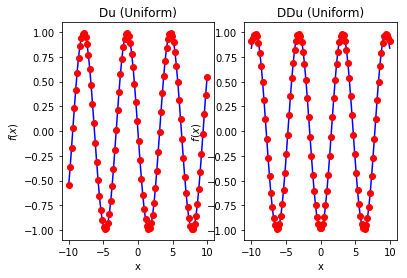

In [53]:
#For cos(x) for uniform grid
n=100
xx= numpy.linspace(-10, 10, n) #uniform grid
xxx= numpy.exp(xx)             #non-uniform monotonically increasing grid


f= numpy.cos(xx)
ff= -numpy.sin(xx)
fff= -numpy.cos(xx)

D= diffmat(xx)
DD= diff2mat(xx)

uu= numpy.dot(D, f)
uuu=numpy.dot(DD,f)

pyplot.figure()
pyplot.subplot(121)
pyplot.plot(xx, ff, 'b', label='$uprime_{exact}$')
pyplot.plot(xx, uu, 'ro', label='Du')
pyplot.xlabel('x')
pyplot.ylabel('$f''(x)$')
pyplot.title('Du (Uniform)')

pyplot.subplot(122)
pyplot.plot(xx, fff, 'b', label='$uprimeprime_{exact}$')
pyplot.plot(xx, uuu, 'ro', label='DDu')
pyplot.xlabel('x')
pyplot.ylabel('$f^{''}(x)$')
pyplot.title('DDu (Uniform)')
pyplot.show()


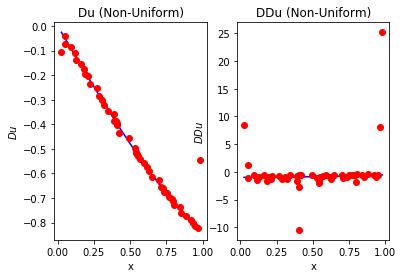

In [52]:
#For cos(x) for non-uniform grid
import random
n=100          
xx = [random.random() for i in range(50)]
xx = numpy.array(sorted(xx))  #non-uniform monotonically increasing grid

f= numpy.cos(xx)
ff= -numpy.sin(xx)
fff= -numpy.cos(xx)

D= diffmat(xx)
DD= diff2mat(xx)

uu= numpy.dot(D, f)
uuu=numpy.dot(DD,f)

pyplot.figure()
pyplot.subplot(121)
pyplot.plot(xx, ff, 'b', label='$uprime_{exact}$')
pyplot.plot(xx, uu, 'ro', label='Du')
pyplot.xlabel('x')
pyplot.ylabel('$Du$')
pyplot.title('Du (Non-Uniform)')

pyplot.subplot(122)
pyplot.plot(xx, fff, 'b', label='$uprimeprime_{exact}$')
pyplot.plot(xx, uuu, 'ro', label='DDu')
pyplot.xlabel('x')
pyplot.ylabel('$DDu$')
pyplot.title('DDu (Non-Uniform)')
pyplot.show()

## Tangent

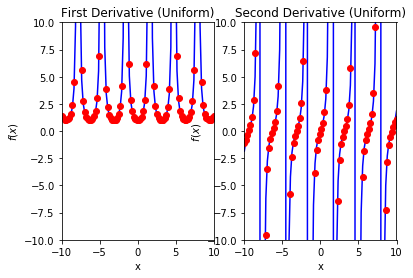

In [54]:
#For tan(x) in a uniform grid
n=100
xx= numpy.linspace(-10, 10, n)
f= numpy.tan(xx)
ff= (1./numpy.cos(xx))**(2.)
fff= 2*(1./numpy.cos(xx))**(2.)*numpy.tan(xx)

D= diffmat(xx)
DD=diff2mat(xx)

uu= numpy.dot(D, f)
uuu=numpy.dot(DD,f)

pyplot.figure()
pyplot.subplot(121)
pyplot.plot(xx, ff, 'b', label='$uprime_{exact}$')
pyplot.plot(xx, uu, 'ro',label='Du')
pyplot.xlabel('x')
pyplot.ylabel('$f''(x)$')
pyplot.axis([-10, 10, -10, 10])
pyplot.title('First Derivative (Uniform)')

pyplot.subplot(122)
pyplot.plot(xx, fff, 'b', label='$uprimeprime_{exact}$')
pyplot.plot(xx, uuu, 'ro',label='DDu')
pyplot.xlabel('x')
pyplot.axis([-10, 10, -10, 10])
pyplot.ylabel('$f^{''}(x)$')
pyplot.title('Second Derivative (Uniform)')
pyplot.show()



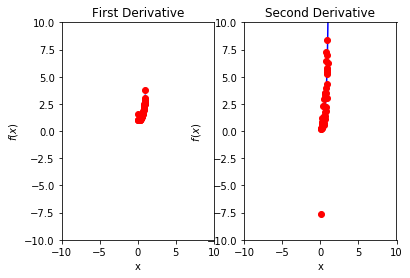

In [35]:
#For tan(x) in a non-uniform grid
n=100         
xx = [random.random() for i in range(50)]
xx = numpy.array(sorted(xx))  #non-uniform monotonically increasing grid
f= numpy.tan(xx)
ff= (1./numpy.cos(xx))**(2.)
fff= 2*(1./numpy.cos(xx))**(2.)*numpy.tan(xx)

D= diffmat(xx)
DD=diff2mat(xx)

uu= numpy.dot(D, f)
uuu=numpy.dot(DD,f)

pyplot.figure()
pyplot.subplot(121)
pyplot.plot(xx, ff, 'b', label='$uprime_{exact}$')
pyplot.plot(xx, uu, 'ro',label='Du')
pyplot.xlabel('x')
pyplot.ylabel('$f''(x)$')
pyplot.axis([-10, 10, -10, 10])
pyplot.title('Du (Non-Uniform)')

pyplot.subplot(122)
pyplot.plot(xx, fff, 'b', label='$uprimeprime_{exact}$')
pyplot.plot(xx, uuu, 'ro',label='DDu')
pyplot.xlabel('x')
pyplot.axis([-10, 10, -10, 10])
pyplot.ylabel('$f^{''}(x)$')
pyplot.title('DDu (Non-Uniform)')
pyplot.show()

